![Julia EO 2023 Banner](figures/JuliaEO_banner.png "Julia EO 2023 Banner")


In this hands-on workshop, we will introduce the [SARprocessing.jl](https://github.com/AIRCentre/SARProcessing.jl) package and see how it can be used to work with Sentinel-1 SAR images. 

This hand-on is somewhat an extention of the [Introduction of SAR, presented at JuliaEO 2023](www.link_to_pres.com). However, we assume no privious knowlegde of SAR data in this notebook.


## Table Of Contents
-  [Include and Introduce SARProcessing.jl](#Include) 
-  [Load and show Image](#show_image)
-  Speckle Reduction
-  Object Detection in SAR images
-  Interferometry



# SARProcessing.jl

 <a class="anchor" id="Include"></a>

Firstly, loading the packages

In [6]:
using SARProcessing;
using Pkg;
Pkg.add("Plots"); #not included in SARProcessing
Pkg.add("JLD")
#Pkg.add("SARProcessing"); #not included in SARProcessing
using Plots;
using Pkg;
using JLD;

   Resolving package versions...


  No Changes to `~/Documents/coding/SARProcessing.jl/Project.toml`
  No Changes to `~/Documents/coding/SARProcessing.jl/Manifest.toml`


   Resolving package versions...


    Updating `~/Documents/coding/SARProcessing.jl/Project.toml`
  [4138dd39] + JLD v0.13.3
    Updating `~/Documents/coding/SARProcessing.jl/Manifest.toml`


  [a74b3585] + Blosc v0.7.3
  [c8ec2601] + H5Zblosc v0.1.0
  [f67ccb44] + HDF5 v0.16.13
  [4138dd39] + JLD v0.13.3
  [0b7ba130] + Blosc_jll v1.21.1+0


# Load and Show image
 <a class="anchor" id="show_image"></a>

Below we see an example of a Sentinel-1 SAR image acquired near Japan


![GRD Image](figures/s1a-iw-grd-vv-20220713t210909-20220713t210935-044087-054337-001.png "GRD image s1a-iw-grd-vv-20220713t210909-20220713t210935-044087-054337-001")


#### Observations:

* Higher intensity in the left side of  the image.

* High and low intensity patterns in the ocean.

* Land has higher intensity than ocean

* High intensity peaks mid ocean



Generally, SAR images are large. SLC images are approx 7.3 GB whereas GRD images are approx. 1.75 GB. We are therefore using smaller subsets for this workshop. Full images can be downloaded from https://search.asf.alaska.edu/#/




-----------


### Loading Subsets

.tiff images can be loaded using the load_tiff function in the SARProcessing module. 

In [9]:
slcSubsetPath = "../test/testData/s1a-iw3-slc-vv_subset_hight9800_10400_width11000_11000.tiff";  # a small subset of a SLC image
slc_image = abs.(SARProcessing.load_tiff(slcSubsetPath));
grd_image_hom = load("data/grd_image_hom.jld")["grd_image_hom"]; # a small subset of a homegenous area in GRD
grd_image = load("data/grd_image.jld")["grd_image"];  # a small subset of an area in GRD

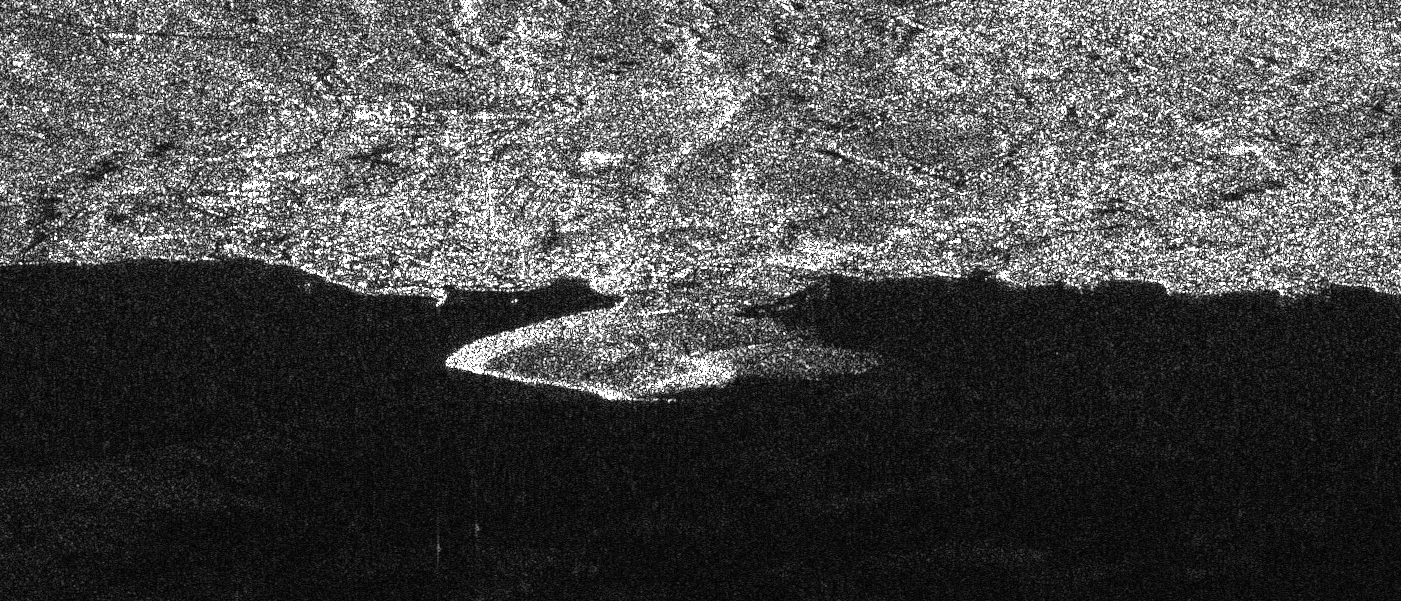

In [10]:
SARProcessing.sar2gray(slc_image, p_quantile = 0.95)

We see:

* point scatters on the ocean
* somewhat homogoneous sea state
* high intensity in the city



The SLC image above is acquired fromt the azores

![CFAR windows](figures/where_azores.png "azores region")



Looking a the intensity value of the SLC image

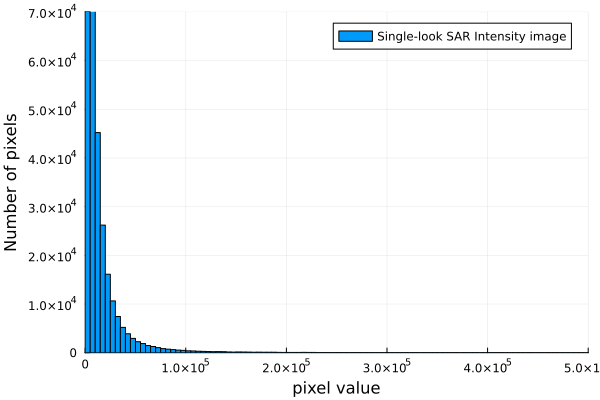

In [11]:
h = histogram(vcat(slc_image.^2...),label="Single-look SAR Intensity image")
ylims!((0,70000))
xlims!((0,500000))
xlabel!("pixel value")
ylabel!("Number of pixels")

The intensity should be negative exponential distributed. The Amplitude image should not.

**Question**: Is the amplitude image exponentially distributed?

### GRD Image

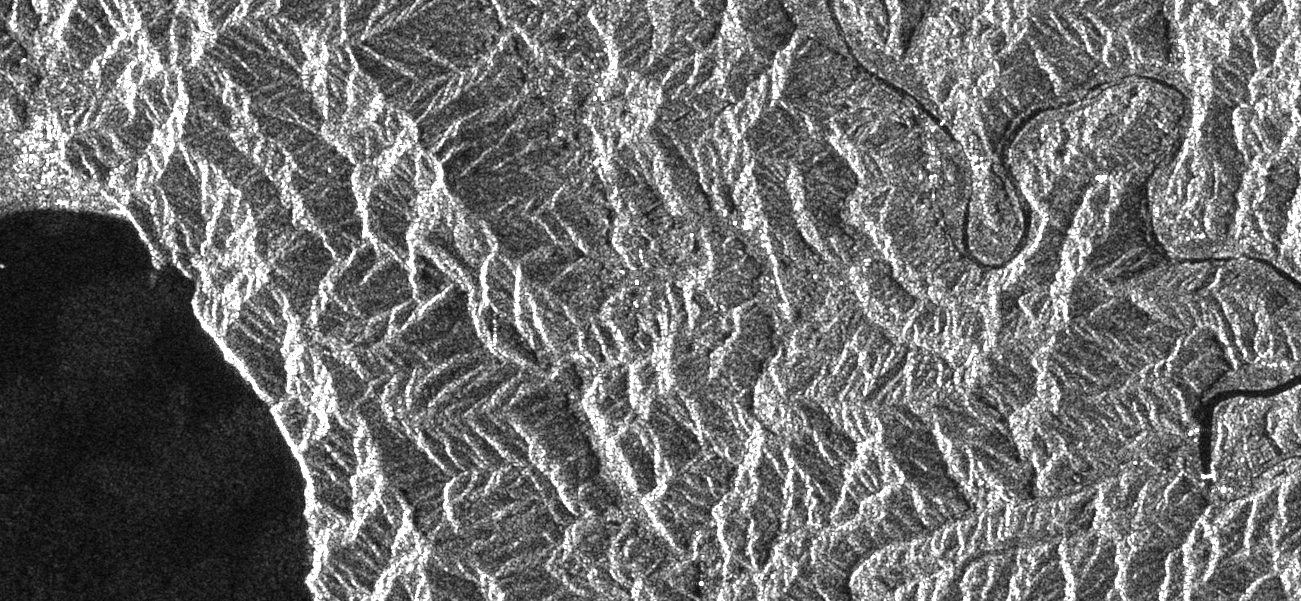

In [13]:
SARProcessing.sar2gray(grd_image, p_quantile = 0.95)

* Relativly high and low patched on the water, with some regions looking somewhat homogeneous.
* Lake has low reflectivity
* Moutain structure

**Question**: Is the SAR looking to the right or to the left?

-----------

Looking at a small multi-looked area

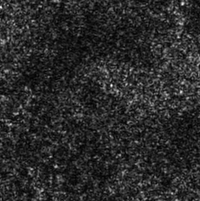

In [7]:
SARProcessing.sar2gray(grd_image[400:600,1:200].^2, p_quantile = 0.99999)

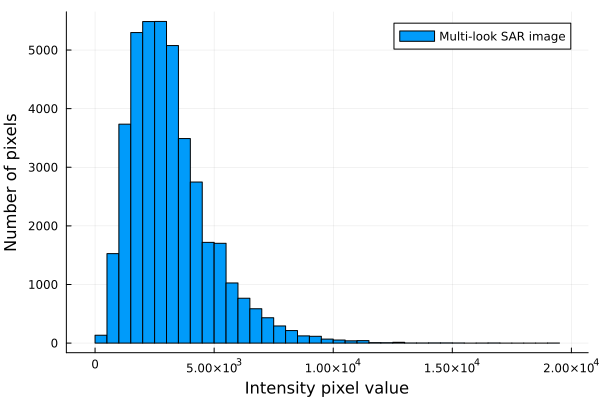

In [27]:
h = histogram(vcat(grd_image[400:600,1:200].^2...),label="Multi-look SAR image",bins=70)

xlabel!("Intensity pixel value")
ylabel!("Number of pixels")



The intensity of a multi-looked image is gamma distributed

**Question**: is the area truely homogenous? (you can use the equivalent_number_of_looks_intensity function)

---------------

* We have now seen how the SARProcessing.jl module can be used to load SAR images. 
* We have looked at SAR images
* Looked at the histograms 

---------------